# Stockdata API

In [1]:
import requests
from dotenv import load_dotenv
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"

# print(api_key)

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
data = requests.get(url).json()

# ALPHA_API_KEY

In [2]:
df = pd.DataFrame(data["Time Series (Daily)"]).transpose().astype(float)
df.head()

,1. open,2. high,3. low,4. close,5. volume
2021-11-05,151.890,152.20,150.06,151.28,65463883.0
2021-11-04,151.580,152.43,150.64,150.96,60394616.0
2021-11-03,150.390,151.97,149.82,151.49,54511534.0
2021-11-02,148.660,151.57,148.65,150.02,68922374.0
2021-11-01,148.985,149.70,147.80,148.96,73396551.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 2021-11-05 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5541 non-null   float64
 1   2. high    5541 non-null   float64
 2   3. low     5541 non-null   float64
 3   4. close   5541 non-null   float64
 4   5. volume  5541 non-null   float64
dtypes: float64(5)
memory usage: 259.7+ KB


In [4]:
df.index

Index(['2021-11-05', '2021-11-04', '2021-11-03', '2021-11-02', '2021-11-01',
       '2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26', '2021-10-25',
       ...
       '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09', '1999-11-08',
       '1999-11-05', '1999-11-04', '1999-11-03', '1999-11-02', '1999-11-01'],
      dtype='object', length=5541)

In [5]:
df.index = pd.to_datetime(df.index)
print(df.index.dtype)
df.head()

datetime64[ns]


,1. open,2. high,3. low,4. close,5. volume
2021-11-05,151.890,152.20,150.06,151.28,65463883.0
2021-11-04,151.580,152.43,150.64,150.96,60394616.0
2021-11-03,150.390,151.97,149.82,151.49,54511534.0
2021-11-02,148.660,151.57,148.65,150.02,68922374.0
2021-11-01,148.985,149.70,147.80,148.96,73396551.0


In [6]:
df.loc["2021"]

,1. open,2. high,3. low,4. close,5. volume
2021-11-05,151.890,152.2000,150.060,151.28,65463883.0
2021-11-04,151.580,152.4300,150.640,150.96,60394616.0
2021-11-03,150.390,151.9700,149.820,151.49,54511534.0
2021-11-02,148.660,151.5700,148.650,150.02,68922374.0
2021-11-01,148.985,149.7000,147.800,148.96,73396551.0
...,...,...,...,...,...
2021-01-08,132.430,132.6300,130.230,132.05,105158245.0
2021-01-07,128.360,131.6300,127.860,130.92,109578157.0
2021-01-06,127.720,131.0499,126.382,126.60,155087970.0
2021-01-05,128.890,131.7400,128.430,131.01,97664898.0


In [7]:
df.loc["2021-10-20":"2021-10-29"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0
2021-10-22,149.690,150.180,148.6400,148.69,58883443.0
2021-10-21,148.810,149.640,147.8700,149.48,61420990.0


In [8]:
import requests
from dotenv import load_dotenv
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import time 

symbols = ["AAPL", "TSLA", "NVDA", "IBM"]
stock_list = []

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")

# print(api_key)
for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)
    time.sleep(20)



In [9]:
stocks = pd.concat(stock_list, axis=1)
stocks.to_csv("stocks.csv")

In [10]:
stocks = pd.read_csv("stocks.csv", index_col=0, parse_dates=True)
stocks.head()

,AAPL,TSLA,NVDA,IBM
2021-11-05,151.28,1222.09,297.52,123.61
2021-11-04,150.96,1229.91,298.01,120.85
2021-11-03,151.49,1213.86,265.98,127.13
2021-11-02,150.02,1172.00,264.01,126.18
2021-11-01,148.96,1208.59,258.27,126.28


In [11]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5541 entries, 2021-11-05 to 1999-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5541 non-null   float64
 1   TSLA    2861 non-null   float64
 2   NVDA    5541 non-null   float64
 3   IBM     5541 non-null   float64
dtypes: float64(4)
memory usage: 216.4 KB


(2, 2)
(4,)


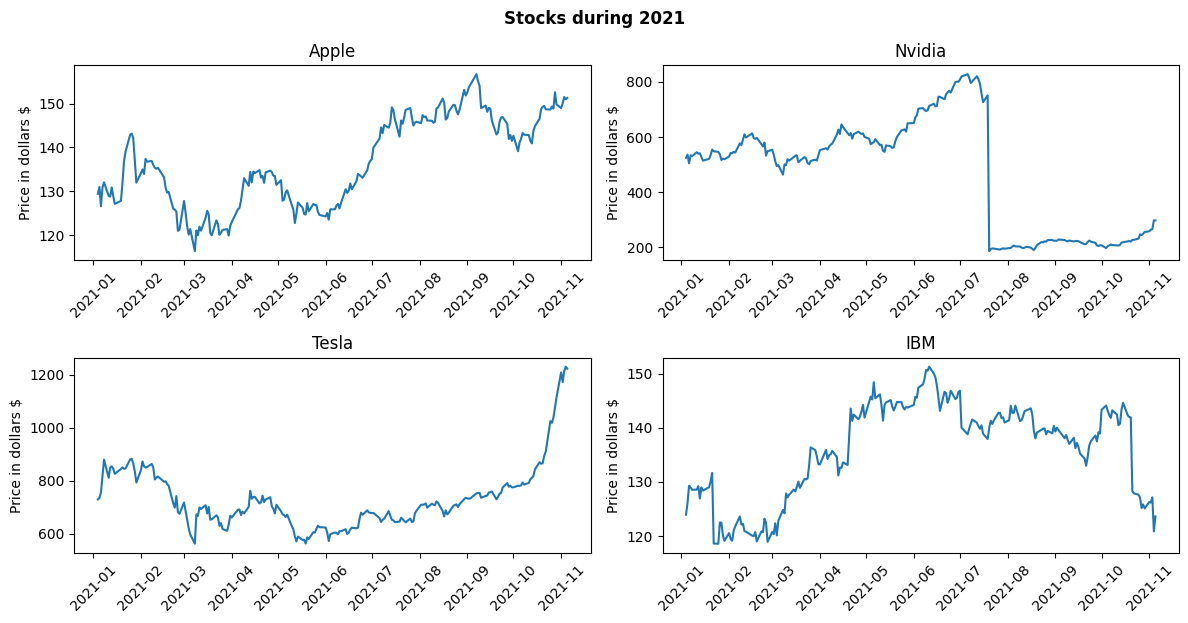

In [12]:
fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))
print(axes.shape)
print(axes.flatten().shape)

stock_2021 = stocks.loc["2021"]

stock_names = dict(AAPL="Apple", NVDA = "Nvidia", TSLA = "Tesla", IBM = "IBM")
for ax, symbol in zip(axes.flatten(), stock_names):
    #print(symbol)
    sns.lineplot(data=stock_2021, x=stock_2021.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price in dollars $")

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold")
plt.savefig("stocks2021.png", facecolor="white")

In [2]:
import requests
from dotenv import load_dotenv
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"
function = "TIME_SERIES_INTRADAY"

url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=5min&apikey={api_key}"
data = requests.get(url).json()



In [13]:
df = pd.DataFrame(data["Time Series (5min)"]).transpose()
df.index = pd.to_datetime(df.index)
df.index.name = "time"
df.head()

,1. open,2. high,3. low,4. close,5. volume
time,,,,,
2021-11-05 20:00:00,151.0900,151.0900,151.0100,151.0500,5513
2021-11-05 19:55:00,151.1000,151.1600,151.0600,151.1600,5012
2021-11-05 19:50:00,151.0700,151.0900,151.0700,151.0700,4656
2021-11-05 19:45:00,151.0800,151.0900,151.0700,151.0700,1040
2021-11-05 19:40:00,151.1101,151.1101,151.0900,151.1000,5324
